In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

class_names = ['toxic']

train = pd.read_csv('gdrive/My Drive/jigsaw-toxic-comment-classification-challenge/train.csv').fillna(' ')
test = pd.read_csv('gdrive/My Drive/jigsaw-toxic-comment-classification-challenge/test.csv').fillna(' ')

train_text = train['comment_text']
test_text = test['comment_text']
all_text = pd.concat([train_text, test_text])

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_features = word_vectorizer.transform(train_text)
test_features = word_vectorizer.transform(test_text)
#print(train_features.shape)
#print(test_features.shape)
#scores = []
train_target = train['toxic']
#nrow_train = train.shape[0]
#X_train, X_test, Y_train, Y_test = train_test_split( train_features, train_target, test_size=0.2, random_state=42)

In [0]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split( train_features, train_target, test_size=0.2, random_state=42)
X_train, Y_train = ros.fit_resample(X_train, Y_train)



**Logistic Regression**

In [0]:
classifier = LogisticRegression(C=0.1, solver='sag')
classifier.fit(X_train, Y_train)
predictions = classifier.predict_proba(X_test)[:, 1]

roc_curve 0.9653457485746278


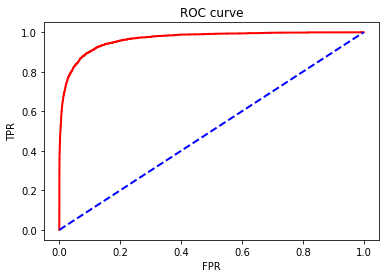

In [0]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score


print("roc_curve {}".format(roc_auc_score(Y_test,predictions)));


##Computing false and true positive rates
fpr, tpr,_=roc_curve(Y_test,predictions)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [0]:

for i in range(len(predictions)):
    if predictions[i]>0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

#print("do")

print("accuracy {}".format(accuracy_score(Y_test,predictions)));

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

#print(conf)

accuracy 0.9309415635281215
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     28859
           1       0.60      0.85      0.70      3056

   micro avg       0.93      0.93      0.93     31915
   macro avg       0.79      0.89      0.83     31915
weighted avg       0.95      0.93      0.94     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     27127  1732
       Toxic           472  2584

**Naive Bayes **

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_recall_fscore_support

gnb = MultinomialNB()
gnb.fit(X_train, Y_train)

predictions = gnb.predict(X_test)


In [0]:
accuracy = accuracy_score(Y_test,predictions)
#precision, recall, fscore, support = precision_recall_fscore_support(Y_test,predictions, average = 'weighted')

#print('Train Accuracy -> ', train_accuracy)
#print('Accuracy -> ', accuracy)
#print('Precision -> ', precision)
#print('Recall -> ', recall)
#print('F-Score -> ', fscore)
#print('Support -> ', support)
print("accuracy {}".format(accuracy_score(Y_test,predictions)));

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

accuracy 0.8795237349208836
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     28859
           1       0.44      0.88      0.58      3056

   micro avg       0.88      0.88      0.88     31915
   macro avg       0.71      0.88      0.76     31915
weighted avg       0.93      0.88      0.90     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     25375  3484
       Toxic           361  2695

**SVM**

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm_model = svm.SVC(C = 0.1, kernel = 'linear')
svm_model.fit(X_train, Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
predictions = svm_model.predict(X_test)

#precision, recall, fscore, support = precision_recall_fscore_support(Y_test,predictions, average = 'weighted')

#print('Train Accuracy -> ', train_accuracy)
#print('Accuracy -> ', accuracy)
#print('Precision -> ', precision)
#print('Recall -> ', recall)
#print('F-Score -> ', fscore)
#print('Support -> ', support)

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     28859
           1       0.62      0.86      0.72      3056

   micro avg       0.94      0.94      0.94     31915
   macro avg       0.80      0.90      0.84     31915
weighted avg       0.95      0.94      0.94     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     27242  1617
       Toxic           436  2620

In [0]:
from sklearn.ensemble import RandomForestClassifier 
#rfc = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=18, random_state=21)
rfc = RandomForestClassifier(n_estimators=10000, max_leaf_nodes=100, random_state=21)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_recall_fscore_support

predictions = rfc.predict(X_test)

accuracy = accuracy_score(Y_test,predictions)
precision, recall, fscore, support = precision_recall_fscore_support(Y_test,predictions, average = 'weighted')

#print('Train Accuracy -> ', train_accuracy)
print('Accuracy -> ', accuracy)
print('Precision -> ', precision)
print('Recall -> ', recall)
print('F-Score -> ', fscore)
print('Support -> ', support)

print(classification_report(Y_test, predictions))
pd.DataFrame(confusion_matrix(Y_test, predictions),
   index = [['Actual', 'Actual'], ['Not Toxic', 'Toxic']],
   columns = [['Predicted', 'Predicted'], ['Not Toxic', 'Toxic']])

Accuracy ->  0.9292495691681028
Precision ->  0.9395362386818992
Recall ->  0.9292495691681028
F-Score ->  0.9331465433336943
Support ->  None
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     28859
           1       0.60      0.77      0.68      3056

   micro avg       0.93      0.93      0.93     31915
   macro avg       0.79      0.86      0.82     31915
weighted avg       0.94      0.93      0.93     31915



Predicted      
                 Not Toxic Toxic
Actual Not Toxic     27291  1568
       Toxic           690  2366